In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import raw data 현지용
demographics = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/PACTALS/raw data/demographic.csv')
als_hx = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/PACTALS/raw data/als_hx.csv')
alsfrs_total_3mo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/PACTALS/raw data/alsfrs_total_3mo_meta_slope.csv')
fvc_3mo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/PACTALS/raw data/fvc_3mo_meta.csv')
lab = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/PACTALS/raw data/lab.csv')
weight = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/PACTALS/raw data/weight.csv')
alsfrs_q_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/PACTALS/raw data/ALSFRS_original_final.csv')
fvc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/fvc.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Read datasets needed
from google.colab import files 
uploaded = files.upload()

Saving als_hx.csv to als_hx.csv
Saving ALSFRS_original.csv to ALSFRS_original.csv
Saving alsfrs_total_3mo_meta_slope.csv to alsfrs_total_3mo_meta_slope.csv
Saving demographic.csv to demographic.csv
Saving fvc.csv to fvc.csv
Saving fvc_3mo_meta.csv to fvc_3mo_meta.csv
Saving lab.csv to lab.csv
Saving weight.csv to weight.csv


In [4]:
# import raw data 원준용
import io
demographics = pd.read_csv(io.BytesIO(uploaded['demographic.csv']))
als_hx = pd.read_csv(io.BytesIO(uploaded['als_hx.csv']))
alsfrs_total_3mo = pd.read_csv(io.BytesIO(uploaded['alsfrs_total_3mo_meta_slope.csv']))
fvc_3mo = pd.read_csv(io.BytesIO(uploaded['fvc_3mo_meta.csv']))
lab = pd.read_csv(io.BytesIO(uploaded['lab.csv']))
weight = pd.read_csv(io.BytesIO(uploaded['weight.csv']))
alsfrs_q_raw = pd.read_csv(io.BytesIO(uploaded['ALSFRS_original.csv']))
fvc = pd.read_csv(io.BytesIO(uploaded['fvc.csv']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. Extracting feature variables

## 1-1. Static features

### (1) Age/Gender (Demographics)

In [5]:
demographics = demographics[['SubjectID', 'Age', 'Gender']]

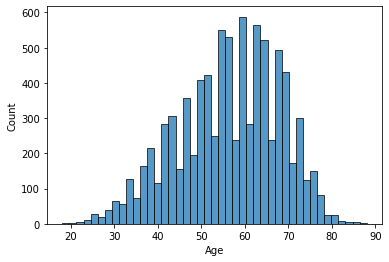

In [6]:
sns.histplot(demographics['Age'])

In [7]:
demographics['Age'].describe() # min = 18, max = 88

count    8646.000000
mean       56.255957
std        11.633752
min        18.000000
25%        48.000000
50%        57.000000
75%        65.000000
max        88.000000
Name: Age, dtype: float64

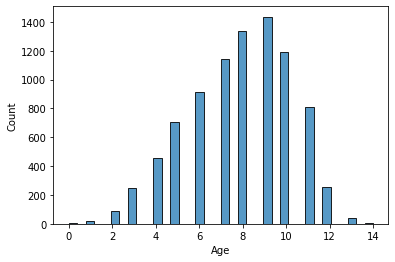

In [8]:
# Convert 'Age' into ordered-categorical data (categorize in  5 years)
age_min = 15 

def cat_age(age, age_min):
  return (age - age_min) // 5

demographics['Age'] = demographics.apply(lambda x: cat_age(x['Age'], age_min), axis = 1)
sns.histplot(demographics['Age'])

In [9]:
# Female = 0, Male = 1
Gend = {"F":0, "M":1}
demographics = demographics.replace({'Gender':Gend})
demographics #8653 data

,SubjectID,Age,Gender
0,329,4.0,0.0
1,348,7.0,0.0
2,533,10.0,0.0
3,586,9.0,1.0
4,649,6.0,0.0
...,...,...,...
8648,999823,8.0,1.0
8649,999863,12.0,1.0
8650,999880,7.0,1.0
8651,999929,8.0,1.0


### (2) diag_delta/onset_delta/diag_minus_onset/onset_site (ALS history)

In [10]:
als_hx = als_hx[['SubjectID', 'diag_delta', 'onset_delta', 'onset_site']]
als_hx['diag_minus_onset'] = als_hx['diag_delta']-als_hx['onset_delta'] #define 'diag_minus_onset' as time difference between onset and diagnosis

In [11]:
# Convert scale 'days' to 'month'
als_hx['diag_delta'] = als_hx['diag_delta']/(365/12)
als_hx['onset_delta'] = als_hx['onset_delta']/(365/12)
als_hx['diag_minus_onset'] = als_hx['diag_minus_onset']/(365/12)

# Bubar_onset = 1, non-Bulbar_onset = 0
onsetsite = {"Other":0, "Bulbar":1, "Limb":0, "Limb and Bulbar":0}
als_hx = als_hx.replace({'onset_site':onsetsite})
als_hx #4454 data

,SubjectID,diag_delta,onset_delta,onset_site,diag_minus_onset
0,329,-35.112329,-56.087671,0.0,20.975342
1,348,-9.928767,-16.471233,0.0,6.542466
2,533,-1.446575,-33.632877,1.0,32.186301
3,586,-16.668493,-23.506849,1.0,6.838356
4,708,-32.416438,-35.178082,1.0,2.761644
...,...,...,...,...,...
4449,999761,-6.608219,-23.572603,0.0,16.964384
4450,999823,-2.761644,-16.175342,0.0,13.413699
4451,999880,-69.205479,-94.191781,0.0,24.986301
4452,999929,-3.517808,-13.512329,0.0,9.994521


## 1-2. Time-resolved features

### (1) alsfrs total slope / FVC

In [12]:
alsfrs_total_slope = alsfrs_total_3mo[['SubjectID', 'alsfrs_total_slope']]
fvc_3mo = fvc_3mo[['SubjectID', 'fvc_slope', 'fvc_mean']]

In [13]:
# Convert scale 'days' to 'month'
alsfrs_total_slope['alsfrs_total_slope'] = alsfrs_total_slope['alsfrs_total_slope']*(365/12)
alsfrs_total_slope #6507 data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SubjectID,alsfrs_total_slope
0,100256,-12.166667
1,100272,-1.600877
2,10059,-2.196320
3,100603,-1.169872
4,100626,-0.074474
...,...,...
6502,999166,NaN
6503,999482,-1.039401
6504,999823,-0.773981
6505,999880,0.352317


In [14]:
# Convert scale 'days' to 'month'
fvc_3mo['fvc_slope'] = fvc_3mo['fvc_slope']*(365/12)
fvc_3mo #7217 data

,SubjectID,fvc_slope,fvc_mean
0,100256,36.500000,78.00
1,100272,-4.002193,119.50
2,10059,-4.649405,82.60
3,100626,0.218456,88.00
4,100791,NaN,76.00
...,...,...,...
7212,999482,-2.108163,78.75
7213,999823,-0.790247,100.80
7214,999863,NaN,40.00
7215,999880,-2.406327,50.25


### (2) Creatinine

In [15]:
creatinine = lab[['SubjectID', 'feature_delta', 'Creatinine']]

In [16]:
# Check string value
creatinine[creatinine['Creatinine']=='<18'] #There are 2 subjects with string value '<18'

,SubjectID,feature_delta,Creatinine
41895,618981,560,<18
42758,631712,1095,<18


In [17]:
# Remove string value and change into float datatype
creatinine = creatinine[creatinine['Creatinine']!='<18']
creatinine = creatinine.astype('float')
creatinine.dtypes 

SubjectID        float64
feature_delta    float64
Creatinine       float64
dtype: object

In [18]:
# Filter first 3 month data
creatinine_3mo = creatinine.query('(feature_delta < 92) and (feature_delta >= 0)')

In [19]:
# Extracting mean_creatinine
mean_creatinine = creatinine_3mo.groupby('SubjectID').agg('mean')
mean_creatinine = mean_creatinine.reset_index()
mean_creatinine.drop(columns='feature_delta', inplace=True)
mean_creatinine #7712 data

,SubjectID,Creatinine
0,329.0,58.933333
1,348.0,53.040000
2,533.0,79.560000
3,649.0,53.040000
4,708.0,88.400000
...,...,...
7707,999308.0,92.000000
7708,999482.0,79.926000
7709,999863.0,NaN
7710,999880.0,88.400000


In [20]:
# Calculate slope of creatinine
C1 = creatinine_3mo.groupby('SubjectID').agg(['first', 'last'])
C1.reset_index(inplace=True)

C1['interval'] = C1[('feature_delta', 'last')] - C1[('feature_delta', 'first')]  # define time interval in 3mo data
C1 = C1[C1['interval']!=0]  # time interval should be positive

C1['interval'] = C1[('feature_delta', 'last')] - C1[('feature_delta', 'first')]
C1['difference'] = C1[('Creatinine', 'last')] - C1[('Creatinine', 'first')]
C1['Creatinine_slope'] = C1['difference']/ C1['interval']
C1 = C1[['SubjectID', 'interval','Creatinine_slope']]
C1

,SubjectID,interval,Creatinine_slope
,,,
0,329.0,72.0,-1.227778
1,348.0,90.0,0.000000
2,533.0,91.0,0.000000
3,649.0,61.0,0.000000
4,708.0,91.0,0.000000
...,...,...,...
7707,999308.0,56.0,0.000000
7708,999482.0,79.0,-0.325367
7709,999863.0,89.0,NaN


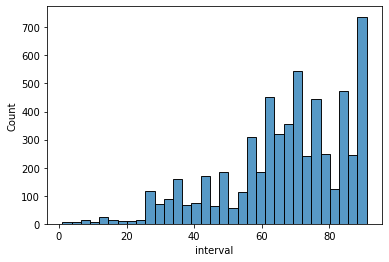

In [21]:
sns.histplot(x = C1['interval'])

In [22]:
# data with time interval less than 30 days is regarded as missing data
slope_creatinine_short = C1[C1['interval'] <30]
slope_creatinine_long = C1[C1['interval']>=30]
slope_creatinine_short['Creatinine_slope']= np.nan

slope_creatinine = pd.concat([slope_creatinine_long, slope_creatinine_short], axis=0)

slope_creatinine.drop(columns='interval', inplace=True)
slope_creatinine #5945 data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,SubjectID,Creatinine_slope
,,
0,329.0,-1.227778
1,348.0,0.000000
2,533.0,0.000000
3,649.0,0.000000
4,708.0,0.000000
...,...,...
7598,985836.0,NaN
7615,988737.0,NaN
7619,988936.0,NaN


In [23]:
# Convert scale 'days' to 'month'
slope_creatinine['Creatinine_slope'] = slope_creatinine['Creatinine_slope']*(365/12)

In [24]:
# Merge mean_creatinine & slope_creatinine
Creatinine_summary = mean_creatinine.merge(slope_creatinine, on = 'SubjectID', how='inner')
Creatinine_summary.columns = ['SubjectID', 'Creatinine_mean', 'Creatinine_slope']
Creatinine_summary #5945 data

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,SubjectID,Creatinine_mean,Creatinine_slope
0,329.0,58.933333,-37.344907
1,348.0,53.040000,0.000000
2,533.0,79.560000,0.000000
3,649.0,53.040000,0.000000
4,708.0,88.400000,0.000000
...,...,...,...
5940,999308.0,92.000000,0.000000
5941,999482.0,79.926000,-9.896582
5942,999863.0,NaN,NaN
5943,999880.0,88.400000,0.000000


### (2) alsfrs_q

In [25]:
alsfrs_q_raw1 = alsfrs_q_raw[['SubjectID', 'feature_delta', 'Q1_Speech','Q2_Salivation', 'Q3_Swallowing', 'Q4_Handwriting', 
                             'Q5_Cutting','Q6_Dressing_and_Hygiene', 'Q7_Turning_in_Bed', 'Q8_Walking', 'Q9_Climbing_Stairs', 'Q10_Respiratory']]

In [26]:
# Filter first 3 month data
alsfrs_q_raw_3mo = alsfrs_q_raw1.query('(feature_delta < 92) and (feature_delta >= 0)')

In [65]:
# Extracting mean_alsfrs_q
mean_alsfrs_q = alsfrs_q_raw_3mo.groupby('SubjectID').agg('mean')
mean_alsfrs_q = mean_alsfrs_q.reset_index()
mean_alsfrs_q.drop(columns='feature_delta', inplace=True)
mean_alsfrs_q.columns=['SubjectID', 'mean_Q1_Speech', 'mean_Q2_Salivation', 'mean_Q3_Swallowing', 'mean_Q4_Handwriting', 
            'mean_Q5_Cutting','mean_Q6_Dressing_and_Hygiene', 'mean_Q7_Turning_in_Bed', 'mean_Q8_Walking', 'mean_Q9_Climbing_Stairs', 'mean_Q10_Respiratory']
mean_alsfrs_q #6507 data

,SubjectID,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory
0,329,4.00,3.000000,4.000000,3.000000,1.900000,3.000000,2.600000,2.000000,1.200000,3.2
1,348,4.00,4.000000,4.000000,3.500000,2.000000,2.250000,3.500000,2.000000,1.000000,4.0
2,533,1.00,1.333333,2.000000,4.000000,4.000000,3.333333,4.000000,3.333333,2.666667,3.0
3,586,0.00,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0
4,649,3.00,3.000000,2.666667,3.666667,3.333333,4.000000,4.000000,4.000000,4.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...
6502,999166,3.00,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.0
6503,999482,2.75,2.750000,3.750000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.0
6504,999823,2.75,3.000000,2.750000,4.000000,3.750000,3.000000,4.000000,4.000000,4.000000,4.0
6505,999880,4.00,4.000000,4.000000,2.000000,1.000000,0.400000,2.800000,2.000000,0.000000,4.0


In [28]:
#Calculate slope of alsfrs_q
df3 = alsfrs_q_raw_3mo.groupby('SubjectID').agg(['first', 'last'])
df3['interval'] = df3.iloc[:, 1] - df3.iloc[:, 0]
df3 = df3[df3['interval']!=0]

df3['slope_Q1_Speech'] = (df3.iloc[:,3] - df3.iloc[:,2])/df3['interval']
df3['slope_Q2_Salivation'] = (df3.iloc[:,5] - df3.iloc[:,4])/df3['interval']
df3['slope_Q3_Swallowing'] = (df3.iloc[:,7] - df3.iloc[:,6])/df3['interval']
df3['slope_Q4_Handwriting'] = (df3.iloc[:,9] - df3.iloc[:,8])/df3['interval']
df3['slope_Q5_Cutting'] = (df3.iloc[:,11] - df3.iloc[:,10])/df3['interval']
df3['slope_Q6_Dressing_and_Hygiene'] = (df3.iloc[:,13] - df3.iloc[:,12])/df3['interval']
df3['slope_Q7_Turning_in_Bed'] = (df3.iloc[:,15] - df3.iloc[:,14])/df3['interval']
df3['slope_Q8_Walking'] = (df3.iloc[:,17] - df3.iloc[:,16])/df3['interval']
df3['slope_Q9_Climbing_Stairs'] = (df3.iloc[:,19] - df3.iloc[:,18])/df3['interval']
df3['slope_Q10_Respiratory'] = (df3.iloc[:,21] - df3.iloc[:,20])/df3['interval']

In [29]:
df3 = df3.reset_index()
df3 = df3[[(                    'SubjectID',      ''),
            (                     'interval',      ''),
            (              'slope_Q1_Speech',      ''),
            (          'slope_Q2_Salivation',      ''),
            (          'slope_Q3_Swallowing',      ''),
            (         'slope_Q4_Handwriting',      ''),
            (             'slope_Q5_Cutting',      ''),
            ('slope_Q6_Dressing_and_Hygiene',      ''),
            (      'slope_Q7_Turning_in_Bed',      ''),
            (             'slope_Q8_Walking',      ''),
            (     'slope_Q9_Climbing_Stairs',      ''),
            (        'slope_Q10_Respiratory',      '')]]
df3.columns = ['SubjectID', 'interval', 'slope_Q1_Speech', 'slope_Q2_Salivation', 'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting','slope_Q6_Dressing_and_Hygiene','slope_Q7_Turning_in_Bed', 'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory']

In [30]:
# data with time interval less than 30 days is regarded as missing data
slope_alsfrs_q_short = df3[df3['interval'] <30]
slope_alsfrs_q_long = df3[df3['interval']>=30]
slope_alsfrs_q_short[              'slope_Q1_Speech']= np.nan
slope_alsfrs_q_short[          'slope_Q2_Salivation']=np.nan
slope_alsfrs_q_short[          'slope_Q3_Swallowing']=np.nan
slope_alsfrs_q_short[         'slope_Q4_Handwriting']=np.nan
slope_alsfrs_q_short[             'slope_Q5_Cutting']=np.nan
slope_alsfrs_q_short['slope_Q6_Dressing_and_Hygiene']=np.nan
slope_alsfrs_q_short[      'slope_Q7_Turning_in_Bed']=np.nan
slope_alsfrs_q_short[             'slope_Q8_Walking']=np.nan
slope_alsfrs_q_short[     'slope_Q9_Climbing_Stairs']=np.nan
slope_alsfrs_q_short[        'slope_Q10_Respiratory']=np.nan
slope_alsfrs_q = pd.concat([slope_alsfrs_q_long, slope_alsfrs_q_short], axis=0)

slope_alsfrs_q.drop(columns='interval', inplace=True)
slope_alsfrs_q #6167 data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,SubjectID,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory
0,329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.013889,0.000000
1,348,0.000000,0.000000,0.000000,0.016393,0.000000,-0.016393,-0.016393,0.000000,0.000000,0.000000
2,533,-0.010989,-0.010989,0.000000,0.000000,0.000000,-0.010989,0.000000,0.010989,0.010989,0.000000
3,649,0.000000,0.000000,0.016393,0.000000,-0.016393,0.000000,0.000000,0.000000,0.000000,0.000000
4,708,0.000000,-0.010989,-0.010989,0.000000,0.000000,0.010989,0.000000,0.000000,0.000000,-0.010989
...,...,...,...,...,...,...,...,...,...,...,...
6076,987208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6091,989785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6108,991794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6157,998542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Convert scale 'days' to 'month'
slope_alsfrs_q['slope_Q1_Speech'] = slope_alsfrs_q['slope_Q1_Speech']*(365/12)
slope_alsfrs_q['slope_Q2_Salivation'] = slope_alsfrs_q['slope_Q2_Salivation']*(365/12)
slope_alsfrs_q['slope_Q3_Swallowing'] = slope_alsfrs_q['slope_Q3_Swallowing']*(365/12)
slope_alsfrs_q['slope_Q4_Handwriting'] = slope_alsfrs_q['slope_Q4_Handwriting']*(365/12)
slope_alsfrs_q['slope_Q5_Cutting'] = slope_alsfrs_q['slope_Q5_Cutting']*(365/12)
slope_alsfrs_q['slope_Q6_Dressing_and_Hygiene'] = slope_alsfrs_q['slope_Q6_Dressing_and_Hygiene']*(365/12)
slope_alsfrs_q['slope_Q7_Turning_in_Bed'] = slope_alsfrs_q['slope_Q7_Turning_in_Bed']*(365/12)
slope_alsfrs_q['slope_Q8_Walking'] = slope_alsfrs_q['slope_Q8_Walking']*(365/12)
slope_alsfrs_q['slope_Q9_Climbing_Stairs'] = slope_alsfrs_q['slope_Q9_Climbing_Stairs']*(365/12)
slope_alsfrs_q['slope_Q10_Respiratory'] = slope_alsfrs_q['slope_Q10_Respiratory']*(365/12)
slope_alsfrs_q

,SubjectID,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory
0,329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.844907,0.000000,0.422454,0.000000
1,348,0.000000,0.000000,0.000000,0.498634,0.000000,-0.498634,-0.498634,0.000000,0.000000,0.000000
2,533,-0.334249,-0.334249,0.000000,0.000000,0.000000,-0.334249,0.000000,0.334249,0.334249,0.000000
3,649,0.000000,0.000000,0.498634,0.000000,-0.498634,0.000000,0.000000,0.000000,0.000000,0.000000
4,708,0.000000,-0.334249,-0.334249,0.000000,0.000000,0.334249,0.000000,0.000000,0.000000,-0.334249
...,...,...,...,...,...,...,...,...,...,...,...
6076,987208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6091,989785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6108,991794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6157,998542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### (3) Weight slope

In [55]:
# Filter first 3 month data
weight_3mo = weight.query('(feature_delta < 92) and (feature_delta >= 0)')

In [56]:
W1 = weight_3mo.groupby('SubjectID').agg(['first', 'last'])
W1.reset_index(inplace=True)

W1['interval'] = W1[('feature_delta', 'last')] - W1[('feature_delta', 'first')]
W1 = W1[W1['interval']!=0]
W1['difference'] = W1[('weight', 'last')] - W1[('weight', 'first')]

W1['weight_slope'] = W1['difference']/ W1['interval']
W1 = W1[['SubjectID', 'interval', 'weight_slope']]
W1.columns = ['SubjectID','interval','weight_slope']

In [57]:
# data with time interval less than 30 days is regarded as missing data
slope_weight_short = W1[W1['interval'] <30]
slope_weight_long = W1[W1['interval']>=30]

In [58]:
slope_weight_short['weight_slope']=np.nan
weight_slope = pd.concat([slope_weight_short, slope_weight_long], axis=0)
weight_slope.drop(columns='interval', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
# Convert scale 'days' to 'month'
weight_slope['weight_slope'] = weight_slope['weight_slope']*(365/12)
weight_slope #5506 data

,SubjectID,weight_slope
93,11052,NaN
101,12118,NaN
118,13902,NaN
170,19344,NaN
188,22674,NaN
...,...,...
7558,999761,-0.167125
7559,999823,-0.534799
7560,999880,-0.217262
7561,999929,-2.100198


## 1-3. Merging all features

In [66]:
features = pd.DataFrame(columns=['SubjectID'])
feature_list = [demographics, als_hx, fvc_3mo, Creatinine_summary, alsfrs_total_slope, mean_alsfrs_q, slope_alsfrs_q, weight_slope]
for i in feature_list :
    df = i
    features = features.merge(df, on='SubjectID', how='outer')
features #9844 data

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,Creatinine_mean,Creatinine_slope,alsfrs_total_slope,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,weight_slope
0,329,4.0,0.0,-35.112329,-56.087671,0.0,20.975342,1.465187,101.25,58.933333,-37.344907,1.739251,4.0,3.000000,4.000000,3.000000,1.900000,3.000000,2.6,2.000000,1.200000,3.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.844907,0.000000,0.422454,0.0,-2.703704
1,348,7.0,0.0,-9.928767,-16.471233,0.0,6.542466,NaN,NaN,53.040000,0.000000,-0.294720,4.0,4.000000,4.000000,3.500000,2.000000,2.250000,3.5,2.000000,1.000000,4.0,0.000000,0.000000,0.000000,0.498634,0.000000,-0.498634,-0.498634,0.000000,0.000000,0.0,1.844945
2,533,10.0,0.0,-1.446575,-33.632877,1.0,32.186301,-17.743056,73.50,79.560000,0.000000,0.064293,1.0,1.333333,2.000000,4.000000,4.000000,3.333333,4.0,3.333333,2.666667,3.0,-0.334249,-0.334249,0.000000,0.000000,0.000000,-0.334249,0.000000,0.334249,0.334249,0.0,-0.167125
3,586,9.0,1.0,-16.668493,-23.506849,1.0,6.838356,NaN,26.00,NaN,NaN,NaN,0.0,2.000000,1.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,649,6.0,0.0,NaN,NaN,NaN,NaN,-2.515664,94.00,53.040000,0.000000,-0.016335,3.0,3.000000,2.666667,3.666667,3.333333,4.000000,4.0,4.000000,4.000000,4.0,0.000000,0.000000,0.498634,0.000000,-0.498634,0.000000,0.000000,0.000000,0.000000,0.0,0.349044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,996669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9840,996888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9841,998661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9842,99872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1-4. Check NaN proportion 

The column Age has 1198 null values. It is 12.17% of total rows.
The column Age is of type float64.

The column Gender has 1197 null values. It is 12.16% of total rows.
The column Gender is of type float64.

The column diag_delta has 5390 null values. It is 54.75% of total rows.
The column diag_delta is of type float64.

The column onset_delta has 5390 null values. It is 54.75% of total rows.
The column onset_delta is of type float64.

The column onset_site has 5391 null values. It is 54.76% of total rows.
The column onset_site is of type float64.

The column diag_minus_onset has 5390 null values. It is 54.75% of total rows.
The column diag_minus_onset is of type float64.

The column fvc_slope has 4588 null values. It is 46.61% of total rows.
The column fvc_slope is of type float64.

The column fvc_mean has 2627 null values. It is 26.69% of total rows.
The column fvc_mean is of type float64.

The column Creatinine_mean has 4128 null values. It is 41.93% of total rows.
The column Creati

[]

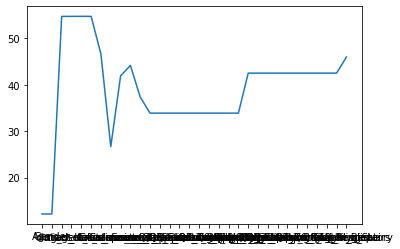

In [67]:
def report_nulls(df):
    '''
    Show a fast report of the DF.
    '''
    rows = df.shape[0]
    columns = df.shape[1]
    null_cols = 0
    list_of_nulls_cols = []
    list_of_nulls_cols_pcn = []
    list_of_nulls_cols_over60 = []
    for col in list(df.columns):
        null_values_rows = df[col].isnull().sum()
        null_rows_pcn = round(((null_values_rows)/rows)*100, 2)
        col_type = df[col].dtype
        if null_values_rows > 0:
            print("The column {} has {} null values. It is {}% of total rows.".format(col, null_values_rows, null_rows_pcn))
            print("The column {} is of type {}.\n".format(col, col_type))
            null_cols += 1
            list_of_nulls_cols.append(col)
            list_of_nulls_cols_pcn.append(null_rows_pcn)
            if null_rows_pcn > 60:
                list_of_nulls_cols_over60.append(col)
    null_cols_pcn = round((null_cols/columns)*100, 2)
    print("The DataFrame has {} columns with null values. It is {}% of total columns.".format(null_cols, null_cols_pcn))
    plt.plot(list_of_nulls_cols, list_of_nulls_cols_pcn)
    return list_of_nulls_cols_over60

report_nulls(features) # {onset_delta / diag_delta / diag_minus_onset}-> 54.75%  {onset_site}-> 54.76%  {mean_alsfrs_q} -> 33.9%  {slope_alsfrs_q} -> 42.52%  of Total 9844 data

In [68]:
features.isnull().sum()

SubjectID                           0
Age                              1198
Gender                           1197
diag_delta                       5390
onset_delta                      5390
onset_site                       5391
diag_minus_onset                 5390
fvc_slope                        4588
fvc_mean                         2627
Creatinine_mean                  4128
Creatinine_slope                 4348
alsfrs_total_slope               3677
mean_Q1_Speech                   3337
mean_Q2_Salivation               3337
mean_Q3_Swallowing               3337
mean_Q4_Handwriting              3337
mean_Q5_Cutting                  3337
mean_Q6_Dressing_and_Hygiene     3337
mean_Q7_Turning_in_Bed           3337
mean_Q8_Walking                  3337
mean_Q9_Climbing_Stairs          3337
mean_Q10_Respiratory             3337
slope_Q1_Speech                  4186
slope_Q2_Salivation              4186
slope_Q3_Swallowing              4186
slope_Q4_Handwriting             4186
slope_Q5_Cut

In [69]:
# Drop NaN of {onset_delta / diag_delta / diag_minus_onset} & {onset_site}
feature_drop_delta = features.dropna(subset=['onset_delta', 'onset_site'])  # patients with NaN value of 'onset_delta' also has NaN value for 'diag_delta' and 'diag_minus_onset'
feature_drop_delta # 4453 data

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,Creatinine_mean,Creatinine_slope,alsfrs_total_slope,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,weight_slope
0,329,4.0,0.0,-35.112329,-56.087671,0.0,20.975342,1.465187,101.25,58.933333,-37.344907,1.739251,4.00,3.000000,4.000000,3.000000,1.90,3.000000,2.600000,2.000000,1.200000,3.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.844907,0.000000,0.422454,0.000000,-2.703704
1,348,7.0,0.0,-9.928767,-16.471233,0.0,6.542466,NaN,NaN,53.040000,0.000000,-0.294720,4.00,4.000000,4.000000,3.500000,2.00,2.250000,3.500000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.498634,0.0,-0.498634,-0.498634,0.000000,0.000000,0.000000,1.844945
2,533,10.0,0.0,-1.446575,-33.632877,1.0,32.186301,-17.743056,73.50,79.560000,0.000000,0.064293,1.00,1.333333,2.000000,4.000000,4.00,3.333333,4.000000,3.333333,2.666667,3.000000,-0.334249,-0.334249,0.000000,0.000000,0.0,-0.334249,0.000000,0.334249,0.334249,0.000000,-0.167125
3,586,9.0,1.0,-16.668493,-23.506849,1.0,6.838356,NaN,26.00,NaN,NaN,NaN,0.00,2.000000,1.000000,4.000000,4.00,4.000000,4.000000,4.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,708,6.0,1.0,-32.416438,-35.178082,1.0,2.761644,-1.883650,51.00,88.400000,0.000000,-0.457380,3.00,2.833333,2.666667,3.166667,3.75,3.166667,4.000000,4.000000,2.833333,2.833333,0.000000,-0.334249,-0.334249,0.000000,0.0,0.334249,0.000000,0.000000,0.000000,-0.334249,-3.309066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,999761,9.0,1.0,-6.608219,-23.572603,0.0,16.964384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.167125
8648,999823,8.0,1.0,-2.761644,-16.175342,0.0,13.413699,-0.790247,100.80,NaN,NaN,-0.773981,2.75,3.000000,2.750000,4.000000,3.75,3.000000,4.000000,4.000000,4.000000,4.000000,-0.370935,0.000000,-0.370935,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.534799
8650,999880,7.0,1.0,-69.205479,-94.191781,0.0,24.986301,-2.406327,50.25,88.400000,0.000000,0.352317,4.00,4.000000,4.000000,2.000000,1.00,0.400000,2.800000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.434524,0.000000,0.000000,0.000000,0.000000,-0.217262
8651,999929,8.0,1.0,-3.517808,-13.512329,0.0,9.994521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.100198


In [70]:
feature_drop_delta.isnull().sum() # {mean_alsfrs_q} -> 365 NaN values,  {slope_alsfrs_q} -> 1035 NaN values

SubjectID                           0
Age                                 0
Gender                              0
diag_delta                          0
onset_delta                         0
onset_site                          0
diag_minus_onset                    0
fvc_slope                        1348
fvc_mean                         1049
Creatinine_mean                  1756
Creatinine_slope                 1891
alsfrs_total_slope                595
mean_Q1_Speech                    365
mean_Q2_Salivation                365
mean_Q3_Swallowing                365
mean_Q4_Handwriting               365
mean_Q5_Cutting                   365
mean_Q6_Dressing_and_Hygiene      365
mean_Q7_Turning_in_Bed            365
mean_Q8_Walking                   365
mean_Q9_Climbing_Stairs           365
mean_Q10_Respiratory              365
slope_Q1_Speech                  1035
slope_Q2_Salivation              1035
slope_Q3_Swallowing              1035
slope_Q4_Handwriting             1035
slope_Q5_Cut

In [71]:
# Drop NaN of {mean_alsfrs_q} 
feature_drop_delta_mean = feature_drop_delta.dropna(subset=['mean_Q1_Speech'])
feature_drop_delta_mean.isnull().sum()

SubjectID                           0
Age                                 0
Gender                              0
diag_delta                          0
onset_delta                         0
onset_site                          0
diag_minus_onset                    0
fvc_slope                         983
fvc_mean                          704
Creatinine_mean                  1392
Creatinine_slope                 1526
alsfrs_total_slope                230
mean_Q1_Speech                      0
mean_Q2_Salivation                  0
mean_Q3_Swallowing                  0
mean_Q4_Handwriting                 0
mean_Q5_Cutting                     0
mean_Q6_Dressing_and_Hygiene        0
mean_Q7_Turning_in_Bed              0
mean_Q8_Walking                     0
mean_Q9_Climbing_Stairs             0
mean_Q10_Respiratory                0
slope_Q1_Speech                   670
slope_Q2_Salivation               670
slope_Q3_Swallowing               670
slope_Q4_Handwriting              670
slope_Q5_Cut

The column fvc_slope has 983 null values. It is 24.05% of total rows.
The column fvc_slope is of type float64.

The column fvc_mean has 704 null values. It is 17.22% of total rows.
The column fvc_mean is of type float64.

The column Creatinine_mean has 1392 null values. It is 34.05% of total rows.
The column Creatinine_mean is of type float64.

The column Creatinine_slope has 1526 null values. It is 37.33% of total rows.
The column Creatinine_slope is of type float64.

The column alsfrs_total_slope has 230 null values. It is 5.63% of total rows.
The column alsfrs_total_slope is of type float64.

The column slope_Q1_Speech has 670 null values. It is 16.39% of total rows.
The column slope_Q1_Speech is of type float64.

The column slope_Q2_Salivation has 670 null values. It is 16.39% of total rows.
The column slope_Q2_Salivation is of type float64.

The column slope_Q3_Swallowing has 670 null values. It is 16.39% of total rows.
The column slope_Q3_Swallowing is of type float64.

The colum

[]

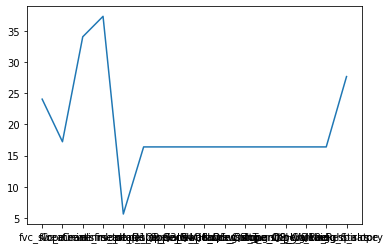

In [72]:
report_nulls(feature_drop_delta_mean) # {onset_delta / diag_delta / diag_minus_onset}-> 0%  {onset_site}-> 0%  {mean_alsfrs_q} -> 0%  {slope_alsfrs_q} -> 16.39%  of Total 4088 data

In [ ]:
feature_drop_delta_mean.to_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/PACTALS/dataset/0725/0815featurewithnans.csv')

## 1-5. Data imputation

In [73]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [75]:
# Data Imputation with IterativeImputer
X = feature_drop_delta_mean
columns = X.columns
imputer = IterativeImputer(sample_posterior = True)
ar = imputer.fit_transform(X)
X_imputed = pd.DataFrame(ar, columns = columns)

In [76]:
X_imputed

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,Creatinine_mean,Creatinine_slope,alsfrs_total_slope,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,weight_slope
0,329.0,4.0,0.0,-35.112329,-56.087671,0.0,20.975342,1.465187,101.250000,58.933333,-37.344907,1.739251,4.000000,3.000000,4.000000,3.000000,1.90,3.000000,2.600000,2.000000,1.200000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.844907,0.000000,0.422454,0.000000,-2.703704
1,348.0,7.0,0.0,-9.928767,-16.471233,0.0,6.542466,-6.777856,83.067494,53.040000,0.000000,-0.294720,4.000000,4.000000,4.000000,3.500000,2.00,2.250000,3.500000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.498634,0.000000,-0.498634,-0.498634,0.000000,0.000000,0.000000,1.844945
2,533.0,10.0,0.0,-1.446575,-33.632877,1.0,32.186301,-17.743056,73.500000,79.560000,0.000000,0.064293,1.000000,1.333333,2.000000,4.000000,4.00,3.333333,4.000000,3.333333,2.666667,3.000000,-0.334249,-0.334249,0.000000,0.000000,0.000000,-0.334249,0.000000,0.334249,0.334249,0.000000,-0.167125
3,586.0,9.0,1.0,-16.668493,-23.506849,1.0,6.838356,0.243324,26.000000,115.279046,-3.592107,-1.264884,0.000000,2.000000,1.000000,4.000000,4.00,4.000000,4.000000,4.000000,4.000000,4.000000,-0.325851,-0.047669,-0.500921,0.056149,0.118272,-0.085504,0.152791,-0.289650,-0.370935,0.356356,-3.401150
4,708.0,6.0,1.0,-32.416438,-35.178082,1.0,2.761644,-1.883650,51.000000,88.400000,0.000000,-0.457380,3.000000,2.833333,2.666667,3.166667,3.75,3.166667,4.000000,4.000000,2.833333,2.833333,0.000000,-0.334249,-0.334249,0.000000,0.000000,0.334249,0.000000,0.000000,0.000000,-0.334249,-3.309066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,998756.0,9.0,1.0,-7.923288,-20.120548,1.0,12.197260,-7.759354,73.333333,68.688989,-9.811978,-0.530451,2.666667,2.666667,3.000000,3.000000,3.00,3.000000,4.000000,3.000000,3.000000,2.000000,0.000000,-0.533626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.238035
4084,999166.0,9.0,1.0,-1.610959,-32.843836,1.0,31.232877,-10.138889,75.000000,83.980000,5.845290,3.977979,3.000000,3.000000,4.000000,4.000000,4.00,4.000000,3.000000,3.000000,3.000000,4.000000,-0.059697,0.172130,0.215488,1.060574,0.316714,0.772474,0.826672,0.279916,0.138972,0.182914,-1.368663
4085,999823.0,8.0,1.0,-2.761644,-16.175342,0.0,13.413699,-0.790247,100.800000,58.249330,-11.739501,-0.773981,2.750000,3.000000,2.750000,4.000000,3.75,3.000000,4.000000,4.000000,4.000000,4.000000,-0.370935,0.000000,-0.370935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.534799
4086,999880.0,7.0,1.0,-69.205479,-94.191781,0.0,24.986301,-2.406327,50.250000,88.400000,0.000000,0.352317,4.000000,4.000000,4.000000,2.000000,1.00,0.400000,2.800000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.434524,0.000000,0.000000,0.000000,0.000000,-0.217262


In [ ]:
X_imputed.to_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/PACTALS/dataset/0815/0817_X_imputed.csv')

# 2. Extracting target variables

## 2-1. Optimal target

### (1) Excluding [initial FVC < 50]

In [79]:
fvc_a = fvc.groupby('SubjectID').agg(['first', 'last'])
fvc_a = fvc_a.reset_index()
fvc_a #7312 data

SubjectID fvc_percent      feature_delta     
                     first last         first last
0           89          75   75             0    0
1          329          98   93             0  274
2          406          83   83             0    0
3          411          79   79             0    0
4          533          77   70             0   12
...        ...         ...  ...           ...  ...
7307    999482          79   33             0  434
7308    999823         103   94             0  184
7309    999863          40   36             0  177
7310    999880          53   49             0  266
7311    999990          88   86            12   68

[7312 rows x 5 columns]

In [81]:
# Remove rows with 'last feature_delta == first feature_delta'
fvc_a = fvc_a[fvc_a[('feature_delta', 'last')]!= fvc_a[('feature_delta', 'first')]]
fvc_a #6073 data

SubjectID fvc_percent      feature_delta     
                     first last         first last
1          329          98   93             0  274
4          533          77   70             0   12
6          649          97   33             0  557
7          708          53   33             0  231
8          902          90   87             0  154
...        ...         ...  ...           ...  ...
7307    999482          79   33             0  434
7308    999823         103   94             0  184
7309    999863          40   36             0  177
7310    999880          53   49             0  266
7311    999990          88   86            12   68

[6073 rows x 5 columns]

In [82]:
# Select rows with 'first fvc_percent >= 50'
fvc_a = fvc_a[fvc_a[('fvc_percent', 'first')]>=50]
fvc_a = fvc_a.reset_index().drop(columns='index')
fvc_filtered_extent = list(fvc_a['SubjectID'])
len(fvc_filtered_extent) #5755 data

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


5755

### (2) Subtracting [initial Q3 score <=2 ]

In [86]:
alsfrs_Sw = alsfrs_q_raw[['SubjectID', 'feature_delta', 'Q3_Swallowing']].reindex(columns=['SubjectID', 'Q3_Swallowing', 'feature_delta'])
alsfrs_Sw = alsfrs_Sw[alsfrs_Sw['feature_delta']>=0]
alsfrs_Sw 

,SubjectID,Q3_Swallowing,feature_delta
0,100256,4.0,0
1,100256,4.0,10
2,100256,4.0,100
3,100256,3.0,189
4,100256,4.0,280
...,...,...,...
59255,999990,4.0,12
59256,999990,4.0,40
59257,999990,4.0,68
59258,999990,3.0,97


In [90]:
alsfrs_Sw_grouped = alsfrs_Sw.groupby('SubjectID').agg(['first', 'last'])
alsfrs_Sw_grouped = alsfrs_Sw_grouped.reset_index()
alsfrs_Sw_grouped = alsfrs_Sw_grouped[alsfrs_Sw_grouped[('feature_delta', 'last')]!= alsfrs_Sw_grouped[('feature_delta', 'first')]] # more than 2 observation needed (score chagnes from above 2 to 2)
alsfrs_filtered_extent = list(alsfrs_Sw_grouped[alsfrs_Sw_grouped[('Q3_Swallowing','first')]>2].reset_index()['SubjectID']) # initial ALSFRS Q3 > 2

In [91]:
# Subtract [FVC < 50] & [first ALSFRS Q3 <=2.0] & [ALSFRS Q3 observed only once]
alsfrs_Sw_filtered = alsfrs_Sw.query("SubjectID == {0}".format(fvc_filtered_extent))
alsfrs_Sw_filtered = alsfrs_Sw_filtered.query("SubjectID == {0}".format(alsfrs_filtered_extent))

### (3) Time of [Q3 score == 2.0]

In [94]:
# Find the first time of [ALSFRS_Q3 <= 2.0]
Optimal_event = alsfrs_Sw_filtered[alsfrs_Sw_filtered['Q3_Swallowing']<=2].groupby('SubjectID').agg(['first']).reset_index()

In [95]:
# Coding [ALSFRS-Q3<=2] event as '1'
Optimal_event_1 = Optimal_event[[(    'SubjectID',      ''), ('feature_delta', 'first')]]
Optimal_event_1.columns = ['SubjectID', 'time_opt']

Optimal_event_1_sublist = list(Optimal_event['SubjectID'])

Optimal_event_1['status_opt'] = 1
print("There are",len(Optimal_event_1['SubjectID'].unique()), "subjects whose status_opt = 1")

# Otherwise '0'
Optimal_event_0 = alsfrs_Sw_filtered[~alsfrs_Sw_filtered['SubjectID'].isin(Optimal_event_1_sublist)]
Optimal_event_0 = Optimal_event_0.groupby('SubjectID').agg(['last']).reset_index().drop(columns=('Q3_Swallowing', 'last'))
Optimal_event_0.columns = ['SubjectID', 'time_opt']
Optimal_event_0['status_opt'] = 0
print("There are",len(Optimal_event_0['SubjectID'].unique()), "subjects whose status_opt = 0")
 # There are 1515 subjects whose status_opt = 1
 # There are 3008 subjects whose status_opt = 0

There are 1515 subjects whose status_opt = 1
There are 3008 subjects whose status_opt = 0


In [96]:
alsfrs_Sw_coded = pd.concat([Optimal_event_1, Optimal_event_0]).sort_values(by='SubjectID', axis=0)
alsfrs_Sw_coded = alsfrs_Sw_coded.reset_index()
alsfrs_Sw_coded.drop(columns='index', inplace=True)

Optimal_Gas = alsfrs_Sw_coded.copy()
sub_list = list(Optimal_Gas['SubjectID'])
Optimal_Gas #4523 data

,SubjectID,time_opt,status_opt
0,329,274,0
1,708,35,1
2,902,154,0
3,1234,245,1
4,1736,187,1
...,...,...,...
4518,999166,390,0
4519,999482,317,1
4520,999823,91,1
4521,999880,266,0


In [ ]:
Optimal_Gas.to_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/PACTALS/dataset/0815/0817_optimal_target.csv')

## 2-2. Real target

### (1) Time of [ALSFRS Q5_b != NaN]

In [105]:
gastro = alsfrs_q_raw[['SubjectID', 'Q5b_Cutting_with_Gastrostomy', 'feature_delta']].sort_values(by=['SubjectID', 'feature_delta'], axis=0).reset_index().drop(columns='index')
gastro

,SubjectID,Q5b_Cutting_with_Gastrostomy,feature_delta
0,329,NaN,0
1,329,NaN,8
2,329,NaN,16
3,329,NaN,42
4,329,NaN,72
...,...,...,...
59255,999990,NaN,12
59256,999990,NaN,40
59257,999990,NaN,68
59258,999990,NaN,97


In [106]:
# Check censored data
def checking_censored(x):
  
  if x.isnull().sum() == 0:
    return "Left censored"
  elif x.notnull().sum() == 0:
    return "Right censored"
  else:
    return "Normal"

aggs_by_col = {'Q5b_Cutting_with_Gastrostomy': [checking_censored], 'feature_delta': ['last']}
gastro_a = gastro.groupby('SubjectID', as_index=False).agg(aggs_by_col)
gastro_a

,SubjectID,Q5b_Cutting_with_Gastrostomy,feature_delta
,,checking_censored,last
0,329,Right censored,274
1,348,Right censored,401
2,533,Normal,378
3,586,Right censored,3
4,649,Normal,557
...,...,...,...
6505,999166,Right censored,390
6506,999482,Right censored,434
6507,999823,Left censored,184


In [107]:
#Subtract Left censored data

gastro_a.columns = ['SubjectID', 'checking_censored', 'last_feature_delta']
gastro_a = gastro_a[gastro_a['checking_censored'] != 'Left censored']
full_extent = list(gastro_a['SubjectID'])
Right_censored_extent = list(gastro_a[gastro_a['checking_censored'] == 'Right censored']['SubjectID'])
Normal_extent = list(gastro_a[gastro_a['checking_censored'] == 'Normal']['SubjectID'])

print("Total number is " + str(len(full_extent))) # Total number is 5797
print("There are " + str(len(Right_censored_extent)) + " right censored data") # There are 4609 right censored data
print("There are " + str(len(Normal_extent)) + " normal data") # There are 1188 normal data

Total number is 5797
There are 4609 right censored data
There are 1188 normal data


In [108]:
# Create gastro_event_0
gastro_event_0 = gastro_a[gastro_a['checking_censored'] == 'Right censored']
gastro_event_0 = gastro_event_0.replace({'checking_censored':{'Right censored': 0}})
gastro_event_0.columns = ['SubjectID', 'status', 'time']
gastro_event_0 #4609 data

,SubjectID,status,time
0,329,0,274
1,348,0,401
3,586,0,3
5,708,0,231
11,2416,0,2
...,...,...,...
6504,998908,0,560
6505,999166,0,390
6506,999482,0,434
6508,999880,0,266


In [110]:
# Create gastro_event_1
gastro_b = gastro.copy()
gastro_b.query("SubjectID == {0}".format(Normal_extent), inplace=True)
gastro_b = gastro_b.dropna(axis=0)
gastro_event_1 = pd.DataFrame(gastro_b.groupby('SubjectID')['feature_delta'].agg('first')).reset_index()
gastro_event_1.columns = ['SubjectID', 'time']
gastro_event_1['status'] = 1
gastro_event_1 = gastro_event_1[gastro_event_1['time'] != 0] # time != 0 
gastro_event_1 #970 data

,SubjectID,time,status
0,533,287,1
1,649,487,1
3,1234,245,1
5,3551,501,1
6,4803,98,1
...,...,...,...
1183,995893,175,1
1184,996401,420,1
1185,996711,379,1
1186,998047,551,1


In [113]:
gastro_fin = pd.concat([gastro_event_1, gastro_event_0]).sort_values(by='SubjectID', axis=0)
gastro_fin = gastro_fin.reset_index().drop(columns = 'index')
gastro_fin.columns = ['SubjectID', 'time_real', 'status_real']
gastro_fin = gastro_fin[gastro_fin['time_real']>92]
Real_Gas = gastro_fin.copy()
Real_Gas # 5027 data

,SubjectID,time_real,status_real
0,329,274,0
1,348,401,0
2,533,287,1
4,649,487,1
5,708,231,0
...,...,...,...
5574,998908,560,0
5575,999166,390,0
5576,999482,434,0
5577,999880,266,0


In [ ]:
Real_Gas.to_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/PACTALS/dataset/0815/0817_optimal_target.csv')

## 2-3. Comparing proportion of censored data in Optimal gas/ Real gas / Survival

In [114]:
# Read datasets needed
from google.colab import files 
uploaded = files.upload()

Saving survival.csv to survival.csv


In [115]:
# import raw data 원준용
import io
surv = pd.read_csv(io.BytesIO(uploaded['survival.csv']))

In [120]:
event_distribution = pd.DataFrame(Optimal_Gas[['status_opt']].value_counts()).reset_index()
event_distribution.columns = ['status_o', 'count']
event_distribution['status_o'] = event_distribution['status_o'].astype('bool')
event_distribution = event_distribution.replace({'status_o': {False:'0 (censored)', True:'1 (occured)'}})
print(event_distribution)

event_distribution_2 = pd.DataFrame(surv[['status']].value_counts()).reset_index()
event_distribution_2.columns = ['status_surv', 'count']
event_distribution_2['status_surv'] = event_distribution_2['status_surv'].astype('bool')
event_distribution_2 = event_distribution_2.replace({'status_surv': {False:'0 (censored)', True:'1 (occured)'}})
print(event_distribution_2)

event_distribution_3 = pd.DataFrame(Real_Gas[['status_real']].value_counts()).reset_index()
event_distribution_3.columns = ['status_real', 'count']
event_distribution_3['status_real'] = event_distribution_3['status_real'].astype('bool')
event_distribution_3 = event_distribution_3.replace({'status_real': {False:'0 (censored)', True:'1 (occured)'}})
print(event_distribution_3)

A_1 = event_distribution.iloc[0]['count']
B_1 = event_distribution.iloc[1]['count']
per_0 = str(round((A_1/(A_1+B_1))*100,2))+"%"
per_1 = str(round((B_1/(A_1+B_1))*100,2))+'%'

A = event_distribution_2.iloc[0]['count']
B = event_distribution_2.iloc[1]['count']
perc_0 = str(round((A/(A+B))*100,2))+"%"
perc_1 = str(round((B/(A+B))*100,2))+'%'

A_2 = event_distribution_3.iloc[0]['count']
B_2 = event_distribution_3.iloc[1]['count']
pe_0 = str(round((A_2/(A_2+B_2))*100,2))+"%"
pe_1 = str(round((B_2/(A_2+B_2))*100,2))+'%'


#        status_o  count
# 0  0 (censored)   3008
# 1   1 (occured)   1515
#     status_surv  count
# 0  0 (censored)   6005
# 1   1 (occured)   3075
#     status_real  count
# 0  0 (censored)   4220
# 1   1 (occured)    807


       status_o  count
0  0 (censored)   3008
1   1 (occured)   1515
    status_surv  count
0  0 (censored)   6005
1   1 (occured)   3075
    status_real  count
0  0 (censored)   4220
1   1 (occured)    807


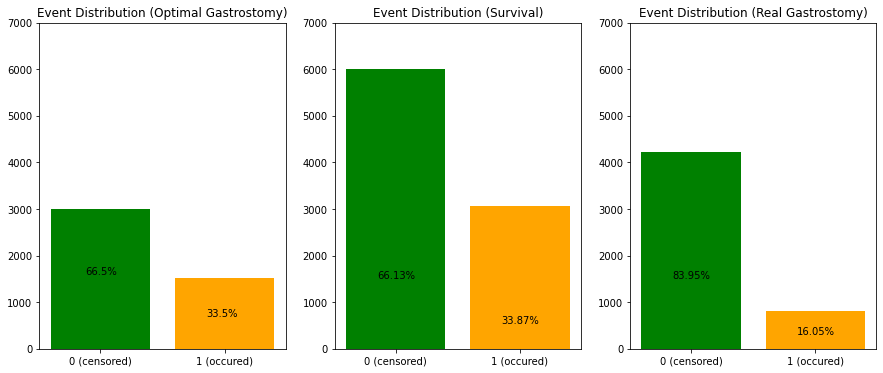

In [122]:
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.bar(event_distribution['status_o'], height=event_distribution['count'], color=['green', 'orange'])
plt.ylim([0,7000])
plt.title('Event Distribution (Optimal Gastrostomy)')
plt.text(-0.12,1600,per_0)
plt.text(0.85,700,per_1)

plt.subplot(132)
plt.bar(event_distribution_2['status_surv'], height=event_distribution_2['count'], color=['green', 'orange'])
plt.ylim([0,7000])
plt.title('Event Distribution (Survival)')
plt.text(-0.15,1500,perc_0)
plt.text(0.85,550,perc_1)

plt.subplot(133)
plt.bar(event_distribution_3['status_real'], height=event_distribution_3['count'], color=['green', 'orange'])
plt.ylim([0,7000])
plt.title('Event Distribution (Real Gastrostomy)')
plt.text(-0.15,1500,pe_0)
plt.text(0.85,300,pe_1)

plt.show()